In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import string as st
import seaborn as sns
from scipy.stats import zscore
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, silhouette_score, silhouette_samples
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',30)

# Load the dataset using pandas
df = pd.read_csv('../Data/GamingStudy_data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0       1  42052.00437     0     0     0     0     1     0     0   
1       2  42052.00680     1     2     2     2     0     1     0   
2       3  42052.03860     0     2     2     0     0     3     1   
3       4  42052.06804     0     0     0     0     0     0     0   
4       5  42052.08948     2     1     2     2     2     3     2   

                   GADE  SWL1  SWL2  SWL3  SWL4  SWL5  ... Narcissism  Gender  \
0  Not difficult at all     3     5     5     5     5  ...        1.0    Male   
1    Somewhat difficult     3     5     2     5     1  ...        1.0    Male   
2  Not difficult at all     2     6     5     2     2  ...        4.0  Female   
3  Not difficult at all     2     5     5     3     2  ...        2.0    Male   
4        Very difficult     2     2     4     5     1  ...        1.0    Male   

   Age                       Work                               Degree  \
0   25  Unemployed / between jobs             Bachelor (or equivalent)   
1   41  Unemployed / between jobs             Bachelor (or equivalent)   
2   32                   Employed             Bachelor (or equivalent)   
3   28                   Employed             Bachelor (or equivalent)   
4   19                   Employed  High school diploma (or equivalent)   

  Birthplace    Residence  Reference  \
0        USA          USA     Reddit   
1        USA          USA     Reddit   
2    Germany      Germany     Reddit   
3        USA          USA     Reddit   
4        USA  South Korea     Reddit   

                                           Playstyle  accept  GAD_T  SWL_T  \
0                                       Singleplayer  Accept      1     23   
1              Multiplayer - online - with strangers  Accept      8     16   
2                                       Singleplayer  Accept      8     17   
3  Multiplayer - online - with online acquaintanc...  Accept      0     17   
4              Multiplayer - online - with strangers  Accept     14     14   

   SPIN_T  Residence_ISO3  Birthplace_ISO3  
0     5.0             USA              USA  
1    33.0             USA              USA  
2    31.0             DEU              DEU  
3    11.0             USA              USA  
4    13.0             KOR              USA  

[5 rows x 55 columns]

In [4]:
df.drop(['S. No.','Timestamp'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

In [6]:
df.describe()

GAD1          GAD2          GAD3          GAD4          GAD5  \
count  13464.000000  13464.000000  13464.000000  13464.000000  13464.000000   
mean       0.860963      0.673351      0.965761      0.724079      0.488042   
std        0.926542      0.915724      0.982776      0.921971      0.837014   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000      3.000000   

               GAD6          GAD7          SWL1          SWL2         SWL3  \
count  13464.000000  13464.000000  13464.000000  13464.000000  13464.00000   
mean       0.911022      0.588755      3.720440      4.602050      4.34544   
std        0.931168      0.894408      1.736264      1.696276      1.80943   
min        0.000000      0.000000      1.000000      1.000000      1.00000   
25%        0.000000      0.000000      2.000000      3.000000      3.00000   
50%        1.000000      0.000000      4.000000      5.000000      5.00000   
75%        1.000000      1.000000      5.000000      6.000000      6.00000   
max        3.000000      3.000000      7.000000      7.000000      7.00000   

               SWL4          SWL5         Hours  highestleague       streams  \
count  13464.000000  13464.000000  13434.000000            0.0  13364.000000   
mean       3.762032      3.358883     22.247357            NaN     11.233538   
std        1.818136      1.916319     70.284502            NaN     78.549209   
min        1.000000      1.000000      0.000000            NaN      0.000000   
25%        2.000000      2.000000     12.000000            NaN      4.000000   
50%        4.000000      3.000000     20.000000            NaN      8.000000   
75%        5.000000      5.000000     28.000000            NaN     15.000000   
max        7.000000      7.000000   8000.000000            NaN   9001.000000   

       ...         SPIN8         SPIN9        SPIN10        SPIN11  \
count  ...  13320.000000  13306.000000  13304.000000  13277.000000   
mean   ...      1.405030      1.567338      0.917769      1.827446   
std    ...      1.372777      1.383539      1.125849      1.488372   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      1.000000      1.000000      1.000000      2.000000   
75%    ...      2.000000      3.000000      1.000000      3.000000   
max    ...      4.000000      4.000000      4.000000      4.000000   

             SPIN12        SPIN13        SPIN14        SPIN15        SPIN16  \
count  13296.000000  13277.000000  13308.000000  13317.000000  13317.000000   
mean       0.892148      0.538827      1.252405      1.411054      0.620635   
std        1.158235      0.944180      1.207463      1.349874      0.961853   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      1.000000      0.000000   
75%        1.000000      1.000000      2.000000      2.000000      1.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

             SPIN17    Narcissism           Age         GAD_T         SWL_T  \
count  13289.000000  13441.000000  13464.000000  13464.000000  13464.000000   
mean       0.935962      2.027677     20.930407      5.211973     19.788844   
std        1.180456      1.061842      3.300897      4.713267      7.229243   
min        0.000000      1.000000     18.000000      0.000000      5.000000   
25%        0.000000      1.000000     18.000000      2.000000     14.000000   
50%        0.000000      2.000000     20.000000      4.000000 

In [7]:
df.shape

(13464, 53)

In [8]:
# Checking for null values
null_counts = (df.isnull() | df.empty | df.isna()).sum()
null_counts[null_counts > 0]

GADE                 649
Hours                 30
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Work                  38
Degree              1577
Reference             15
accept               414
SPIN_T               650
Residence_ISO3       110
Birthplace_ISO3      121
dtype: int64

We see that there are 30 columns with null values. We will either fill or drop them one by one.

In [9]:
# Fill the null values in the GADE column
df['GADE'].value_counts()

GADE
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: count, dtype: int64

In [10]:
df['GADE'] = df['GADE'].fillna(df['GADE'].value_counts().index[1])

In [11]:
df['GADE'].value_counts()

GADE
Not difficult at all    6236
Somewhat difficult      5797
Very difficult          1012
Extremely difficult      419
Name: count, dtype: int64

In [12]:
# Fill the null values in streams and hours columns
df['streams'] = df['streams'].fillna(int(df['streams'].mean()))
df['Hours'] = df['Hours'].fillna(int(df['Hours'].mean()))

In [13]:
# Arranging the unique values correctly
print('Before Total Unique values:', df['League'].nunique())
df['League'] = df['League'].str.lower().str.strip()
print('After Total Unique values:', df['League'].nunique())

Before Total Unique values: 1454
After Total Unique values: 1209


In [14]:
df['League'].value_counts()

League
gold                                                 1350
silver                                                902
platinum                                              842
diamond                                               731
unranked                                              395
                                                     ... 
gold/platinum                                           1
top team(dp2), plat 3(lol)                              1
not played ranked yet, was platinum 2 last season       1
silver 1 (cs) silver 5 (lol)                            1
ahgl                                                    1
Name: count, Length: 1209, dtype: int64

We can see that there are many different types of silvers or gold leagues. Let's combine them all into one.

In [15]:
df['League'] = df['League'].str.extract(r'^([a-z]+)')

In [16]:
df['League'].nunique()

210

In [17]:
df['League'].unique()

array([nan, 'gold', 'none', 'na', 'diamond', 'not', 'bronze', 'silver',
       'n', 'unranked', 'i', 'bad', 'legendary', 'global', 'potato',
       'master', 'silverii', 'platinum', 'masters', 'challenger', 'lvl',
       'platin', 'promos', 'top', 'd', 'plat', 'rank', 'grandmaster',
       'platnium', 's', 'haven', 'platinium', 'in', 'gv', 'provisional',
       'placements', 'g', 'was', 'the', 'division', 'pplatinum', 'hr',
       'only', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'dont', 'high', 'very', 'starcraft', 'challenjour',
       'fusion', 'low', 'unraked', 'havent', 'got', 'golden', 'cs', 'p',
       'standard', 'still', 'highest', 'nope', 'dia', 'league', 'nova',
       'mge', 'silber', 'siver', 'never', 'b', 'platinun', 'mg',
       'supreme', 'for', 'greater', 'wood', 'le', 'no', 'natural', 'aram',
       'don', 'currently', 'noone', 'grand', 'hs', 'current', 'last',
       'first', 'recently', 'fucking', 'grandmasters', 'golf', 'of',
       'glod'

Some of the values here are also short forms of the other Leagues. For example g, gv, golden etc are all gold League. Let's convert them all into one.

In [18]:
# Filling the people who play for fun to unranked League
df.loc[(df['whyplay']== 'having fun') ,'League'] = df.loc[(df['whyplay']== 'having fun') ,'League'].fillna('unranked')
# Fill null values with gold League
df['League'] = df['League'].fillna('gold')

In [19]:
# Replacing all the short forms of the League names into proper League names
golds = ['g', 'gv', 'golden','glod','golld', 'golf', 'goled', 'golderino','giii']
df['League'] = df['League'].replace(golds , 'gold')
silvers = [ 'silverii', 's', 'sliver', 'siver', 'silber', 'sil', 'silveriv']
df['League'] = df['League'].replace(silvers , 'silver')
plats = ['platinium', 'platnium', 'platin', 'pplatinum', 'plarinum', 'platium', 'p', 'platine', 'platinun', 'platonum', 'platnum', 'plata', 'plantinum', 'platinuim', 'platunum', 'plantinum', 'platunum', 'platinumm', 'platv', 'platina', 'plat']
df['League'] = df['League'].replace(plats , 'platinum')
bronzers = ['bronce' , 'b' , 'broze' , 'lowest', 'wood', 'elohell'] 
df['League'] = df['League'].replace(bronzers , 'bronze')
unranked = ['none' , 'na', 'not' , 'n', 'promos', 'provisional', 'placements', 'dont', 'was', 'unraked', 'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank', 'ranked', 'placement', 'unrankt', 'non', 'unfranked', 'promotion', 'idk', 'unplaced', 'probably', 'provisionals', 'didnt','unrakned', 'unfinished', 'just', 'x', 'promotions', 'unseeded', 'haven']
df['League'] = df['League'].replace(unranked , 'unranked')
diamonds =  ['d', 'dia', 'diaomnd', 'diamont', 'diamomd']
df['League'] = df['League'].replace(diamonds , 'diamond')
gm =  ['grand', 'gm', 'grandmasters']
df['League'] = df['League'].replace(gm , 'grandmaster')
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
df['League'] = df['League'].replace(chall , 'challenger')
df['League'] = df['League'].replace('mg' , 'mge')
df['League'] = df['League'].replace('masters' , 'master')
df['League'] = df['League'].replace( ['le', 'legdendary'] , 'legendary')

In [20]:
df['League'].unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'i', 'bad',
       'legendary', 'global', 'potato', 'master', 'platinum',
       'challenger', 'lvl', 'top', 'rank', 'grandmaster', 'in', 'the',
       'division', 'hr', 'only', 'legend', 'dmg', 'high', 'very',
       'starcraft', 'fusion', 'low', 'got', 'cs', 'standard', 'still',
       'highest', 'league', 'nova', 'mge', 'supreme', 'for', 'greater',
       'natural', 'aram', 'currently', 'hs', 'current', 'last', 'first',
       'recently', 'fucking', 'challenged', 'tier', 'soloq', 'esl',
       'double', 'used', 'lem', 'csgo', 'eu', 'finished', 'zilean',
       'cardboard', 'heroic', 'torment', 'lol', 'almost', 'season',
       'german', 'placed', 'un', 'mid', 'uwot', 'spanish', 'around', 'sc',
       'germany', 'conqueror', 'im', 'close', 'hearthstone', 'complete',
       'finishing', 'coals', 'qualifiying', 'god', 'distinguished',
       'doing', 'seaon', 'pre', 'unable', 'ended', 'were', 'seeding',
       'ex', 'smfc', 'gla

We still have many values that doesn't make any sense like lvl, hr, only etc. We will deal with them now.

In [21]:
# We will remove the league with less than 3 occurences
league_counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(league_counts[league_counts < 3].index)]

In [22]:
df['League'].unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'i', nan,
       'legendary', 'master', 'platinum', 'challenger', 'top', 'rank',
       'grandmaster', 'in', 'legend', 'dmg', 'high', 'starcraft', 'cs',
       'still', 'league', 'nova', 'mge', 'supreme', 'greater',
       'currently', 'last', 'lem', 'csgo', 'lol', 'season'], dtype=object)

In [23]:
# Now let's replace the leagues that we do not understand the proper meaning with nan and fill them as "unspecified"
df['League'] = df.League.replace(['i', 'currently', 'high', 'season', 'lol', 'cs', 'last', 'csgo', 'starcraft', 'geater', 'in', 'rank', 'still'] , np.nan)
df['League'] = df['League'].fillna('unspecified')

In [24]:
df['League'].unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'unspecified',
       'legendary', 'master', 'platinum', 'challenger', 'top',
       'grandmaster', 'legend', 'dmg', 'league', 'nova', 'mge', 'supreme',
       'greater', 'lem'], dtype=object)

In [25]:
df['League'].value_counts()

League
gold           4094
platinum       2647
silver         2283
unranked       1713
diamond        1635
bronze          554
unspecified     211
master          166
challenger       79
grandmaster      18
dmg              12
legendary         8
mge               8
league            7
top               6
legend            6
nova              5
supreme           5
greater           4
lem               3
Name: count, dtype: int64

In [26]:
# Dropping Birthplace and Birthplace_ISO3 columns
df.drop(['Birthplace','Birthplace_ISO3'], axis=1, inplace=True)

In [27]:
# Updating values of Residence
df['Residence'] = df['Residence'].replace('Unknown', df['Residence'].mode()[0])
df['Reference'] = df['Reference'].fillna('Other')

In [28]:
df['Residence_ISO3'] = df['Residence_ISO3'].fillna('USA')

In [29]:
df.drop(df[df['accept'].isnull()].index, axis=0, inplace=True)

In [30]:
# Filling all null values of the Social Phobia Inventory scores columns with mode
cols = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9','SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [31]:
df.drop('highestleague', axis=1, inplace=True)

In [32]:
df['Work'] = df['Work'].fillna(df['Work'].mode()[0])

In [33]:
# Updating the values of Columns in Playstyle, earnings and whyplay so that the uniqie values become normal. Some of them do not have proper punctuation.
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))

In [34]:
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()

Converting all the values in the 3 columns having values with more than usual length into Other

In [35]:
df['earnings'] = df['earnings'].replace(df['earnings'].value_counts().index[3:] ,'Other')
df['earnings'].value_counts()

earnings
i play for fun                                                                           11742
i play mostly for fun but earn a little on the side tournament winnings streaming etc      966
Other                                                                                      297
i earn a living by playing this game                                                        45
Name: count, dtype: int64

In [36]:
df['whyplay'] = df['whyplay'].replace(df['whyplay'].value_counts().index[5:] ,'Other')
df['whyplay'].value_counts()

whyplay
having fun          5151
improving           4744
winning             2035
relaxing             632
Other                432
all of the above      56
Name: count, dtype: int64

In [37]:
df['Playstyle'] = df['Playstyle'].replace(df['Playstyle'].value_counts().index[5:] ,'Other')
df['Playstyle'].value_counts()

Playstyle
multiplayer  online  with real life friends                    5441
multiplayer  online  with strangers                            3986
multiplayer  online  with online acquaintances or teammates    2555
singleplayer                                                    730
Other                                                           294
multiplayer  offline people in the same room                     44
Name: count, dtype: int64

In [38]:
# Replacing Other value with nan values and dropping them
df['Playstyle'] = df['Playstyle'].replace('Other', np.nan)
df['whyplay'] = df['whyplay'].replace('Other', np.nan)
df['earnings'] = df['earnings'].replace('Other', np.nan)

In [39]:
df.dropna(inplace=True)

In [40]:
null_counts = (df.isnull() | df.empty | df.isna()).sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

Now we can see, there are no null values in the data.

In [41]:
df.shape

(10739, 50)

In [42]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Residence',
       'Reference', 'Playstyle', 'accept', 'GAD_T', 'SWL_T', 'SPIN_T',
       'Residence_ISO3'],
      dtype='object')

Columns left after cleaning the data

In [43]:
# Normalizing the Columns
cols = ['Hours', 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
df[cols] = MinMaxScaler().fit_transform(df[cols])

# Outliers

Z-Score: Calculate the Z-score for each data point and identify points with a Z-score greater than a certain threshold (typically 3 or -3).
IQR (Interquartile Range): Calculate the IQR for each numerical variable and identify any data points that fall outside the 1.5 times IQR range.

In [44]:
# Selecting only numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Calculating Z-scores
z_scores = zscore(df[numerical_cols])

# Setting threshold for Z-score (typically 3 or -3)
threshold = 3

# Finding outliers
outliers = (z_scores > threshold).any(axis=1)

Rows with outliers (using Z-score method):
       GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  \
1         1     2     2     2     0     1     0    Somewhat difficult     3   
2         0     2     2     0     0     3     1  Not difficult at all     2   
14        0     0     0     1     0     1     0  Not difficult at all     2   
18        1     1     1     2     2     1     0    Somewhat difficult     1   
22        0     0     0     1     1     1     0  Not difficult at all     5   
...     ...   ...   ...   ...   ...   ...   ...                   ...   ...   
13363     3     3     3     2     1     1     3   Extremely difficult     2   
13400     2     2     3     1     1     2     3        Very difficult     3   
13427     0     0     1     1     0     1     0    Somewhat difficult     7   
13438     3     3     3     3     3     3     3  Not difficult at all     7   
13460     3     3     3     3     2     3     3   Extremely difficult     5   

       S

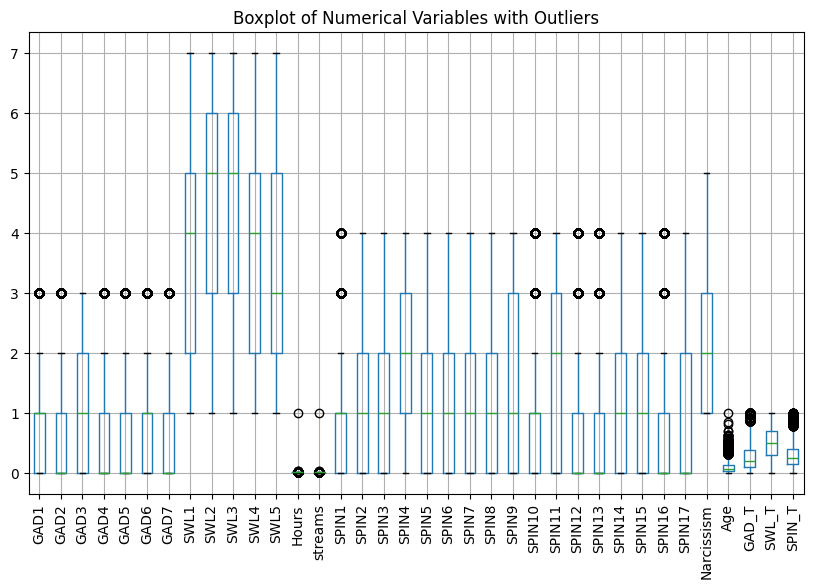

In [45]:
# Displaying rows with outliers
print("Rows with outliers (using Z-score method):")
print(df[outliers])

# Plotting boxplot with outliers
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables with Outliers')
plt.xticks(rotation=90)
plt.show()


Rows with outliers (using IQR method):
       GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  \
1         1     2     2     2     0     1     0    Somewhat difficult     3   
2         0     2     2     0     0     3     1  Not difficult at all     2   
3         0     0     0     0     0     0     0  Not difficult at all     2   
4         2     1     2     2     2     3     2        Very difficult     2   
8         2     3     2     2     0     1     2        Very difficult     2   
...     ...   ...   ...   ...   ...   ...   ...                   ...   ...   
13447     0     0     0     3     1     2     0  Not difficult at all     5   
13451     0     0     1     0     0     1     0  Not difficult at all     5   
13452     1     0     1     0     0     0     0    Somewhat difficult     2   
13460     3     3     3     3     2     3     3   Extremely difficult     5   
13462     3     2     1     3     0     1     3    Somewhat difficult     2   

       SWL2

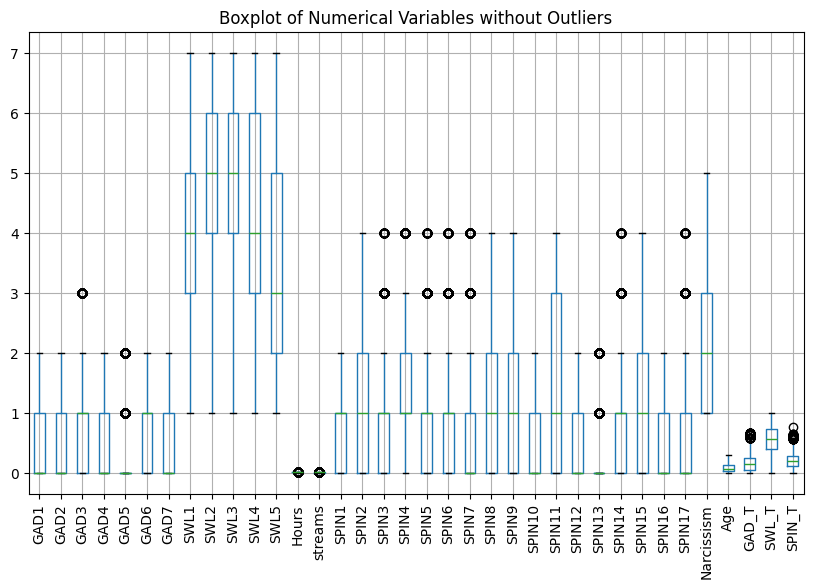

In [46]:
# IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Finding outliers using IQR method
outliers_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Displaying rows with outliers detected by IQR method
print("\nRows with outliers (using IQR method):")
print(df[outliers_iqr])

# Plotting boxplot with outliers removed
plt.figure(figsize=(10, 6))
df[numerical_cols][~outliers_iqr].boxplot()
plt.title('Boxplot of Numerical Variables without Outliers')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Removing outliers detected by Z-score method
df_filtered_zscore = df[~outliers]

# Removing outliers detected by IQR method
df_filtered_iqr = df[~outliers_iqr]

Identified outliers using both the Z-score method and the Interquartile Range (IQR) method. We then prints out the rows containing outliers detected by each method. For the Z-score method, the code identified 1007 rows with outliers, and for the IQR method, it identified 4259 rows with outliers. These rows are displayed in the output.

In [48]:
df_filtered_iqr['Hours']

0        0.001875
5        0.000500
6        0.003750
7        0.003125
9        0.003125
           ...   
13456    0.001500
13458    0.003750
13459    0.005000
13461    0.002500
13463    0.001875
Name: Hours, Length: 6480, dtype: float64

# EDA(Exploratory Data Analysis)

In [49]:
# Summary statistics of our dataset
summary_stats = df_filtered_iqr.describe()
print(summary_stats)

              GAD1         GAD2         GAD3         GAD4         GAD5  \
count  6480.000000  6480.000000  6480.000000  6480.000000  6480.000000   
mean      0.538426     0.350000     0.646451     0.420370     0.268210   
std       0.619739     0.572859     0.742199     0.614296     0.544068   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     0.000000   
max       2.000000     2.000000     3.000000     2.000000     2.000000   

              GAD6         GAD7         SWL1         SWL2         SWL3  \
count  6480.000000  6480.000000  6480.000000  6480.000000  6480.000000   
mean      0.617593     0.304938     4.051698     4.919444     4.771451   
std       0.676188     0.559673     1.642246     1.523087     1.617952   
min       0.000000     0.000000     1

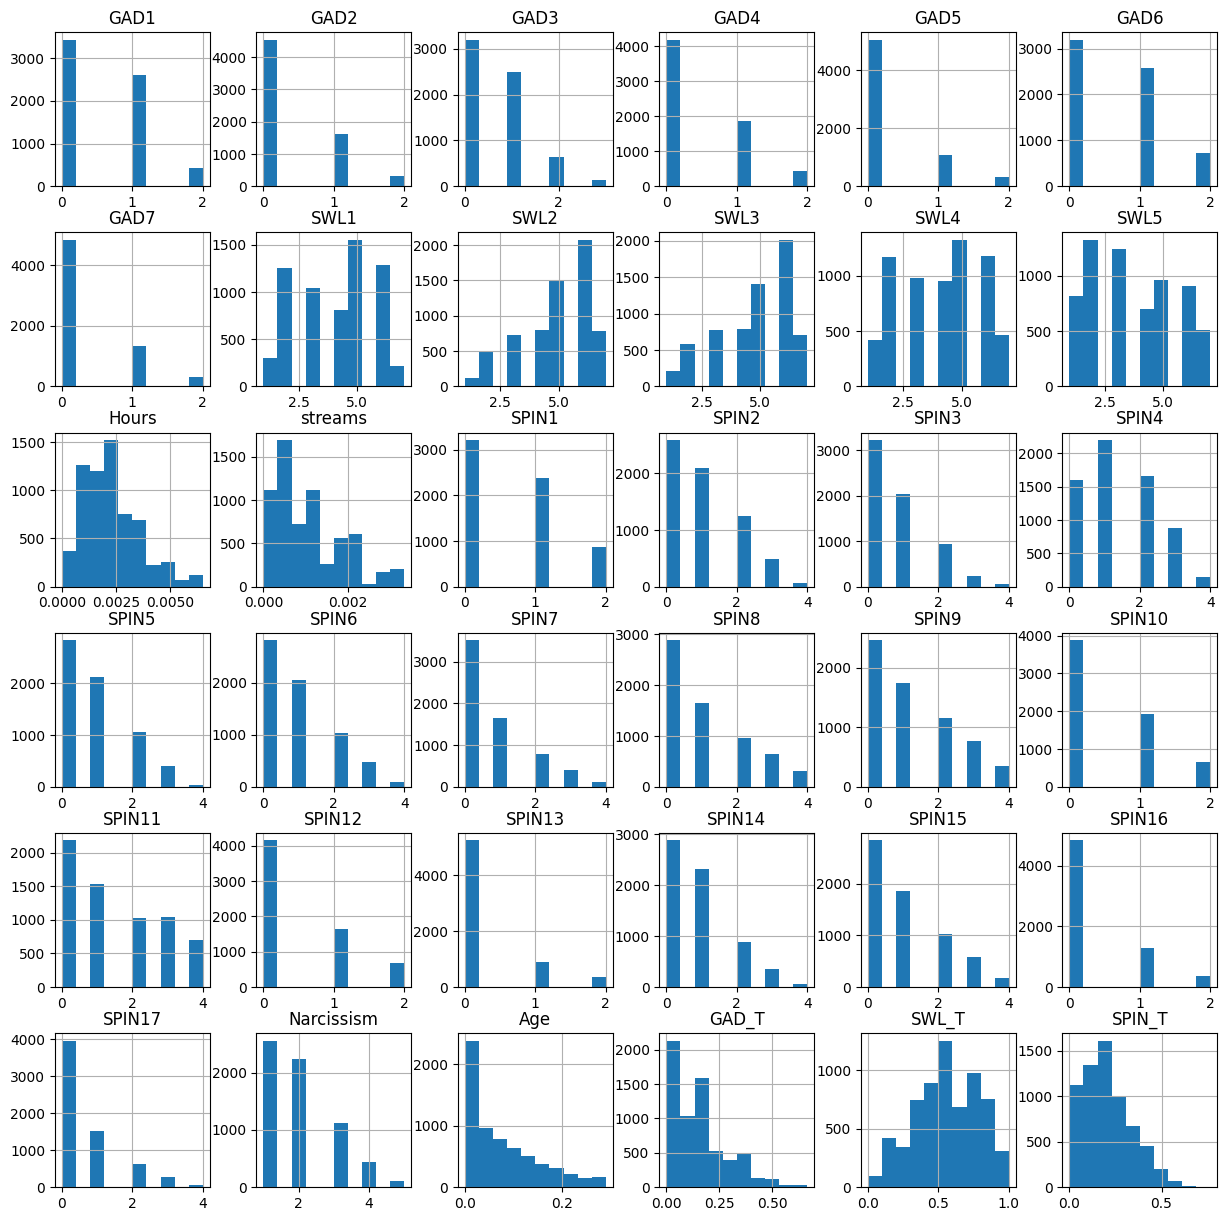

In [50]:
# Histograms
df_filtered_iqr.hist(figsize=(15, 15))
plt.show()

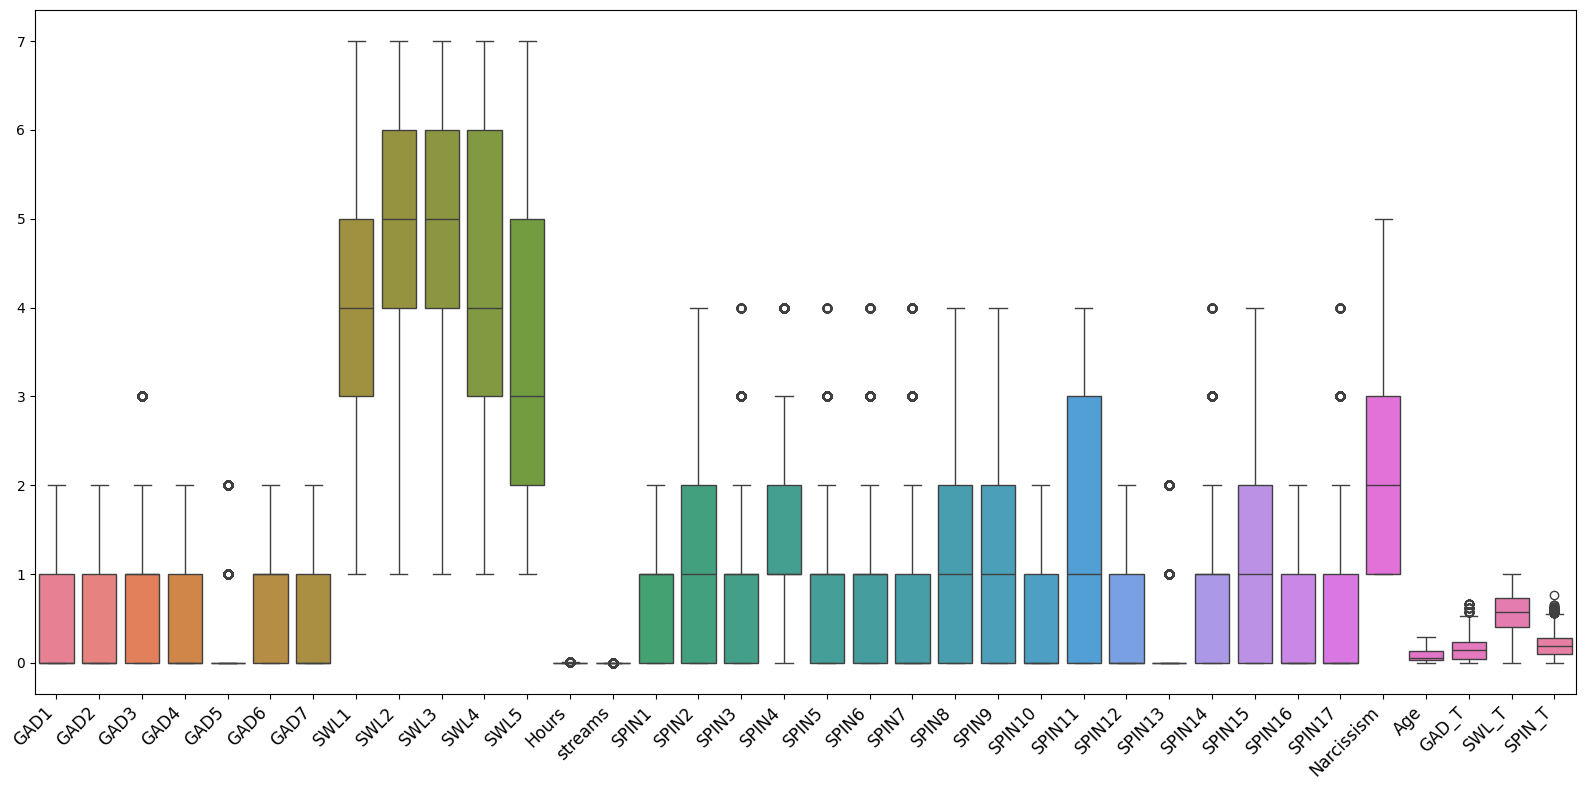

In [51]:
# Adjusting the figure size and rotation for better readability
plt.figure(figsize=(16, 8))  # Increase the figure size
sns.boxplot(data=df_filtered_iqr[numerical_cols])
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust alignment and fontsize
plt.tight_layout()  # Adjust the padding to fit labels better
plt.show()

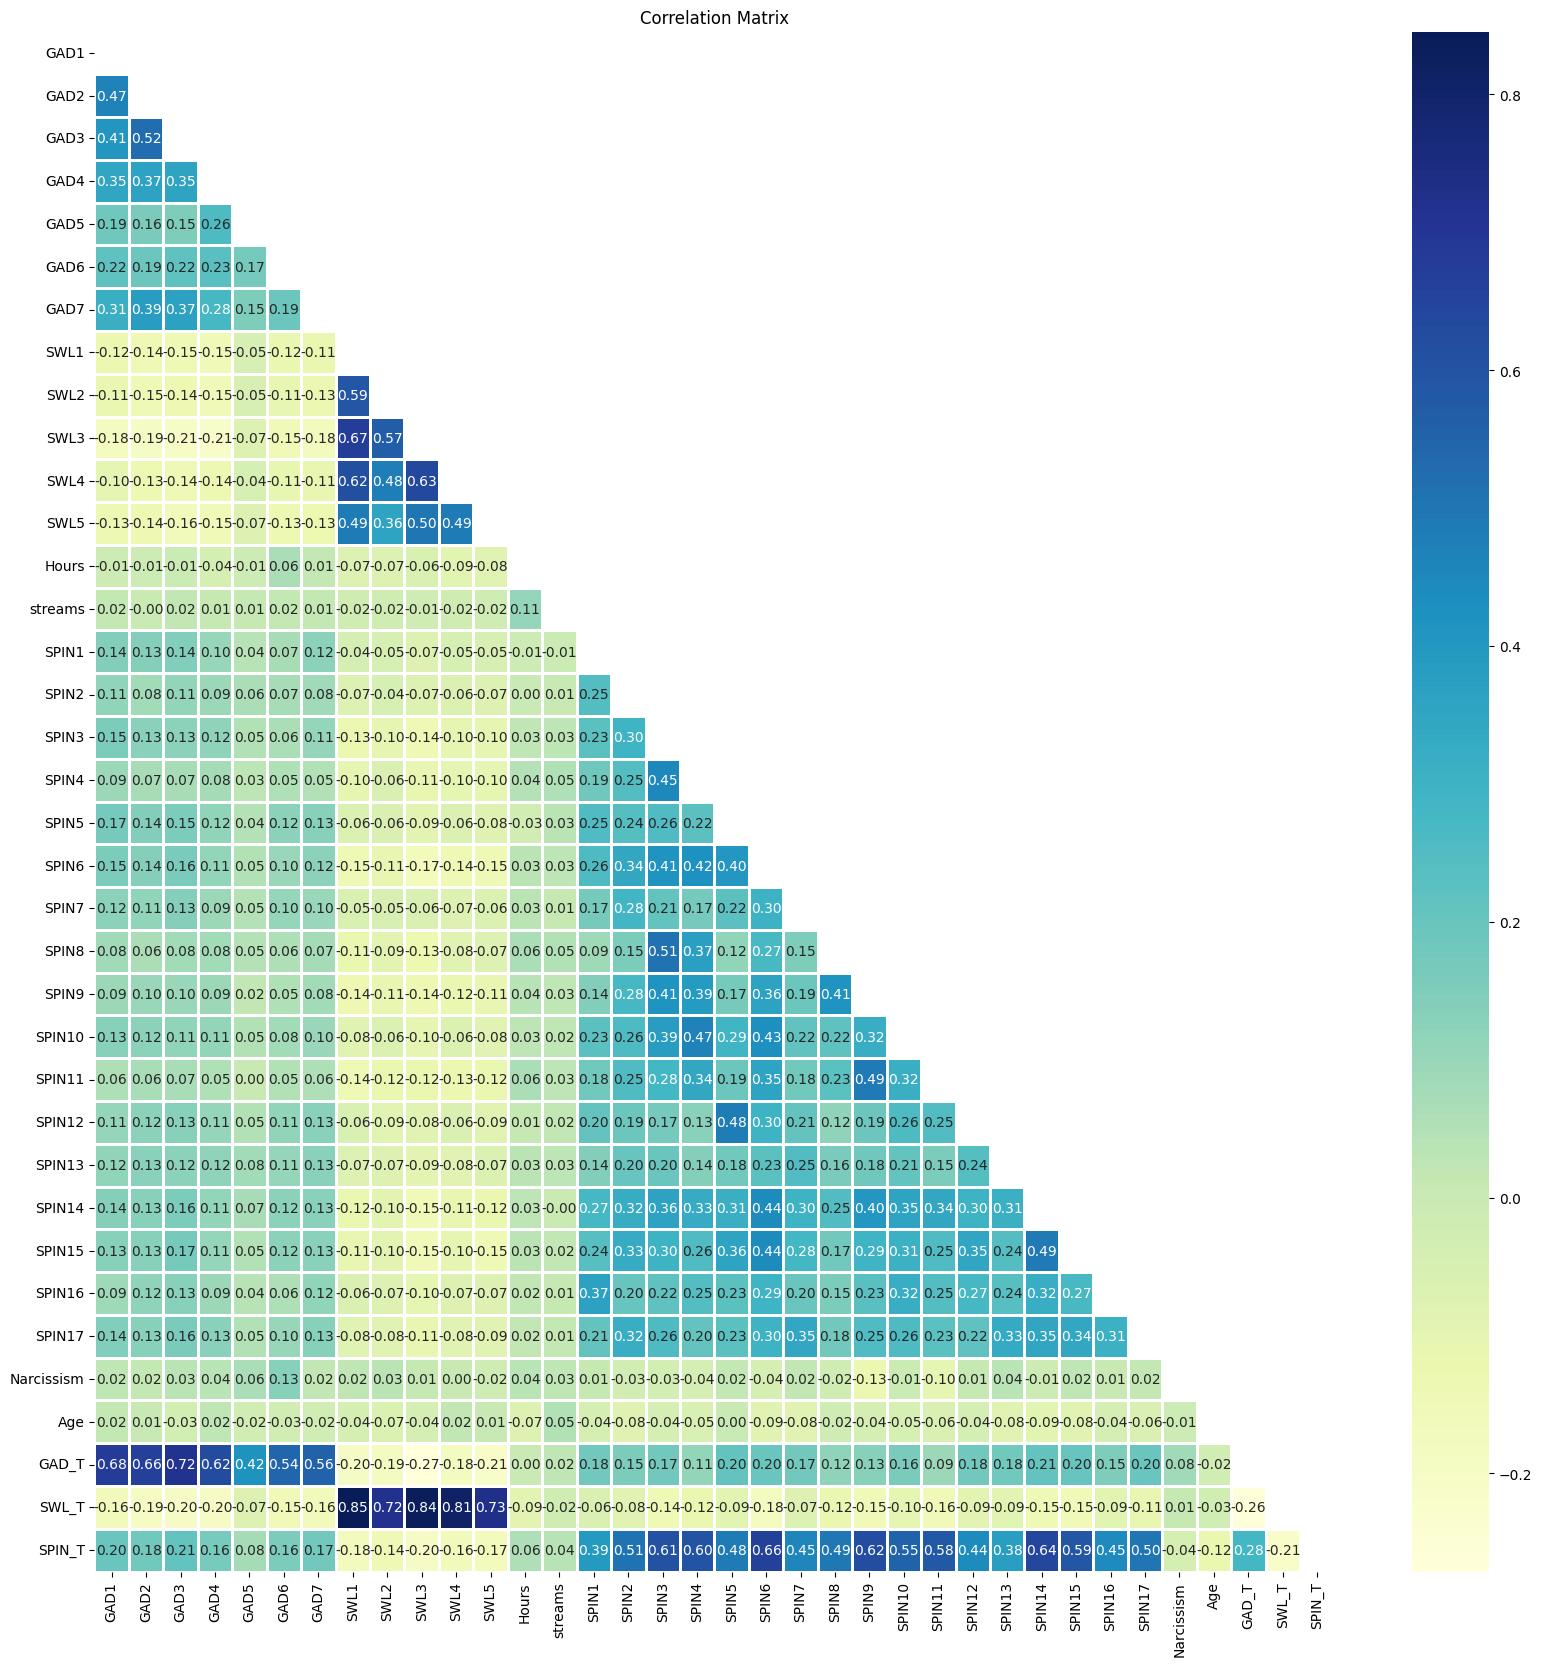

In [52]:
# Correlation Table
corr = df_filtered_iqr[numerical_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (20, 20))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

All the columns are either positively or negatively correlation and looks fine.

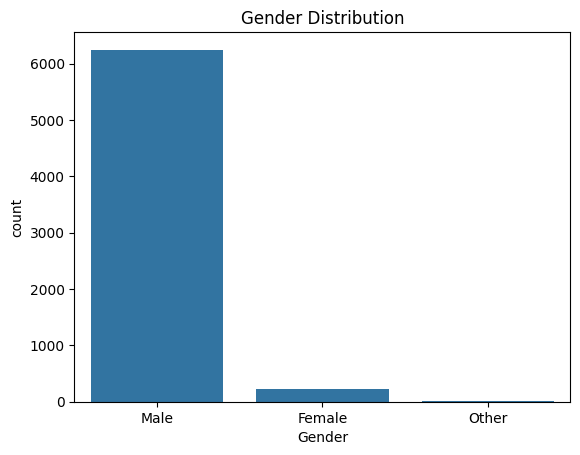

In [53]:
# Count plot of Gender
sns.countplot(x='Gender', data=df_filtered_iqr)
plt.title('Gender Distribution')
plt.show()

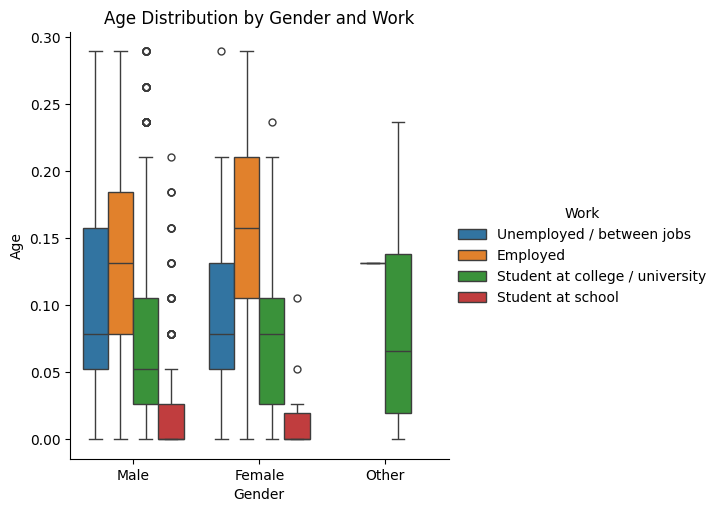

In [54]:
# Categorical plot of Age Distribution
sns.catplot(x='Gender', y='Age', hue='Work', kind='box', data=df_filtered_iqr)
plt.title('Age Distribution by Gender and Work')
plt.show()

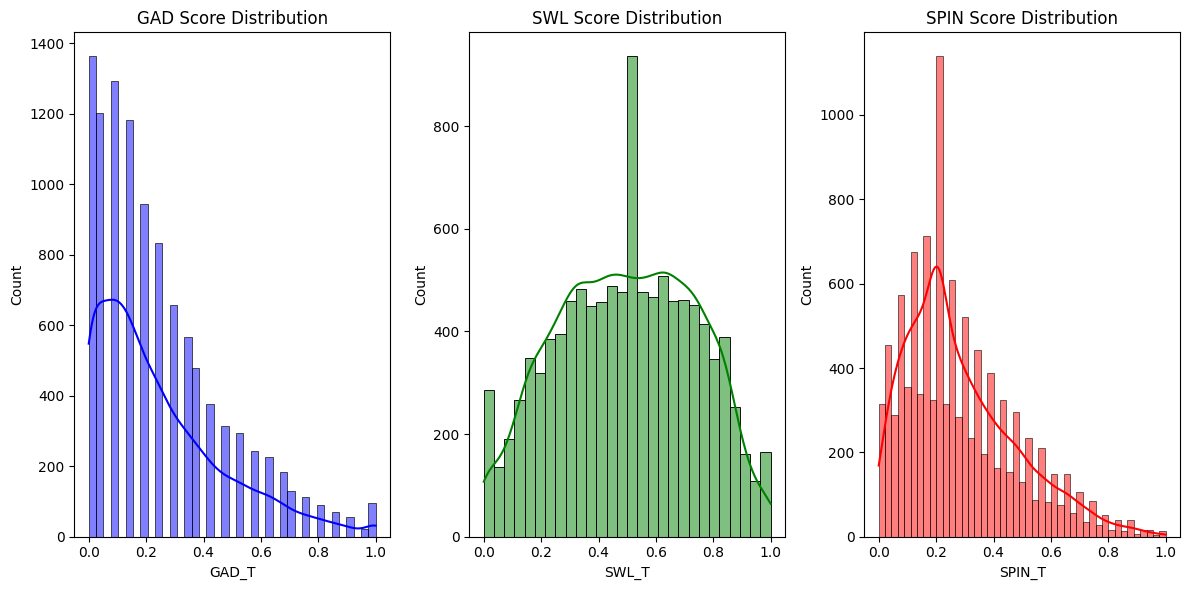

In [55]:
# Distribution of Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['GAD_T'], kde=True, color='blue')
plt.title('GAD Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['SWL_T'], kde=True, color='green')
plt.title('SWL Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['SPIN_T'], kde=True, color='red')
plt.title('SPIN Score Distribution')

plt.tight_layout()
plt.show()

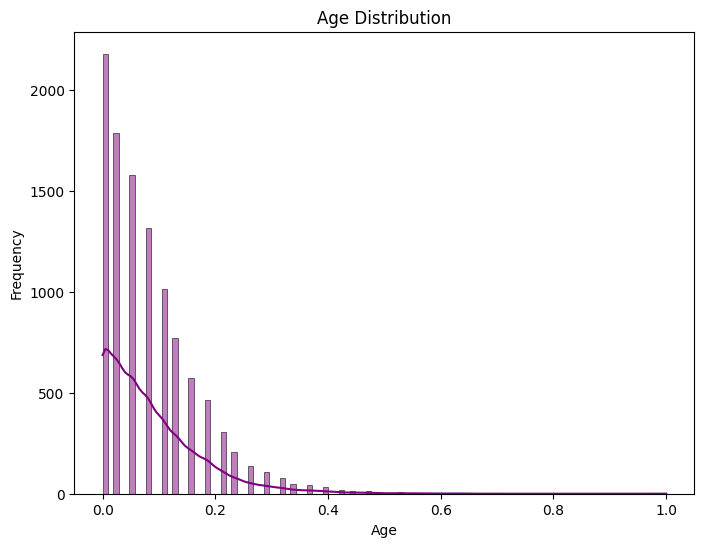

In [56]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

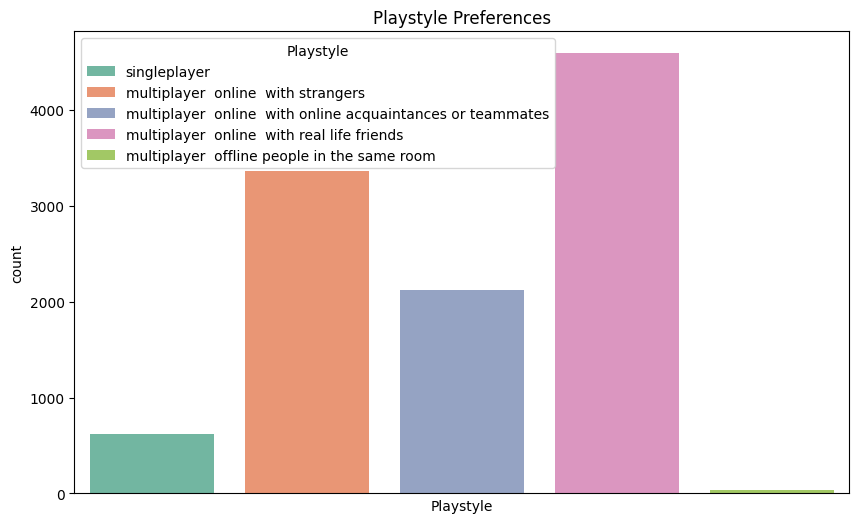

In [57]:
# Playstyle Preferences
plt.figure(figsize=(10, 6))
sns.countplot(x='Playstyle',hue='Playstyle', data=df, palette='Set2',legend=True)
plt.title('Playstyle Preferences')
plt.xticks([])
plt.show()

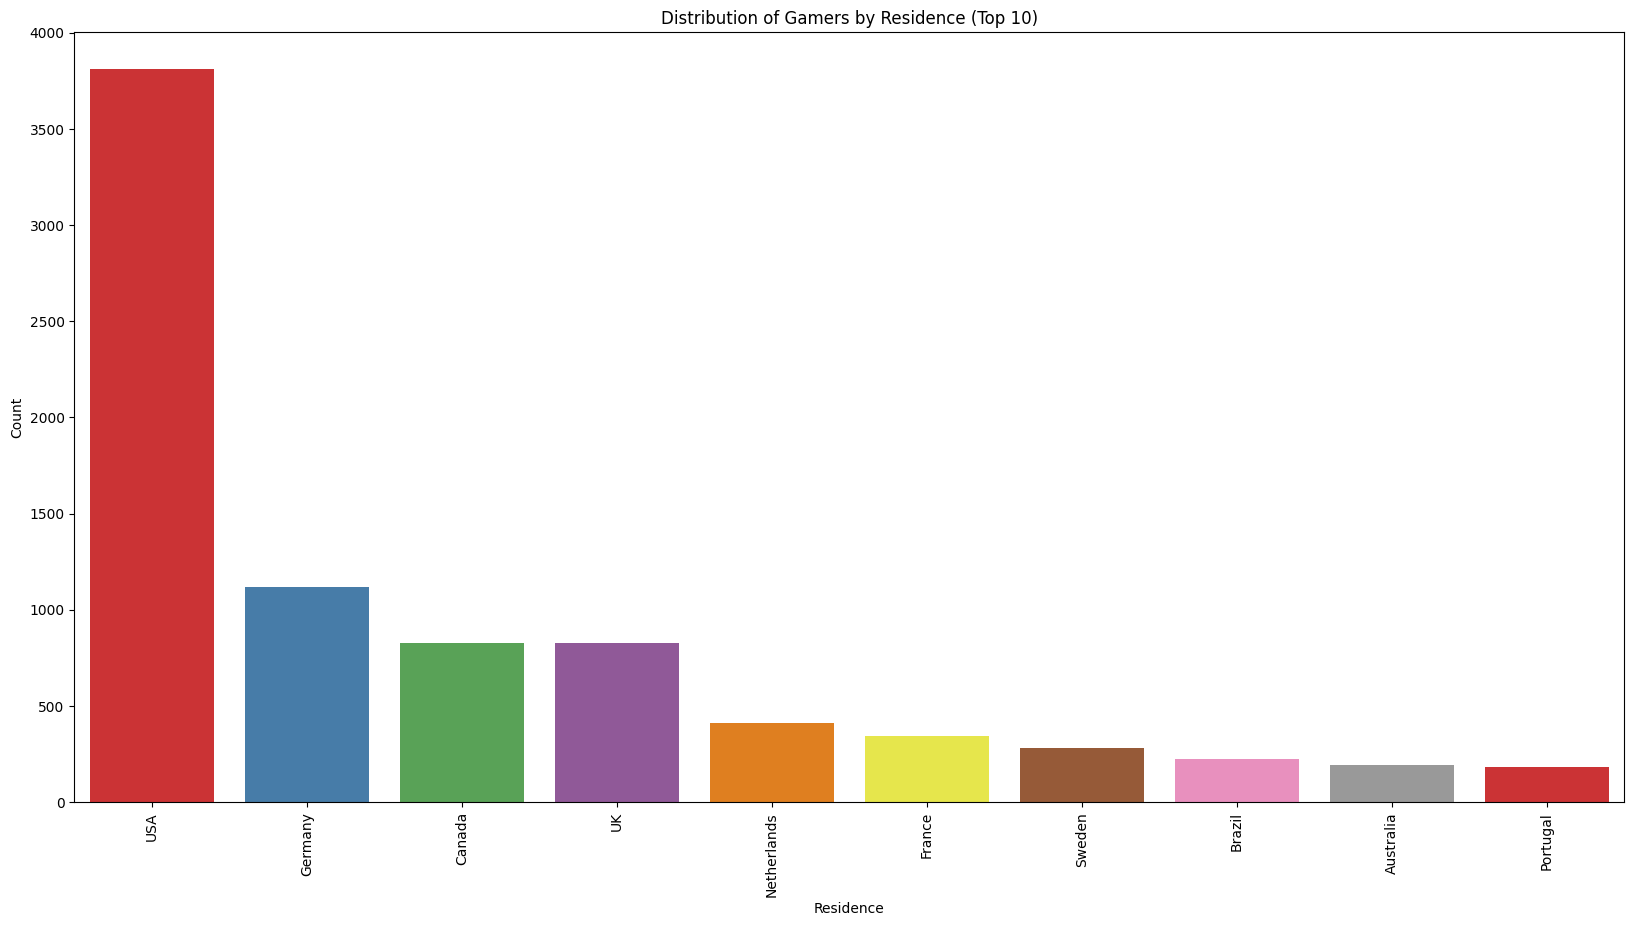

In [58]:
# Bar chart of countries of the players residing
# Count the occurrences of each residence
residence_counts = df['Residence'].value_counts().nlargest(10)

# Include only the top 10 residences
df_top_residences = df[df['Residence'].isin(residence_counts.index)]

# Plotting the top 10 residences
plt.figure(figsize=(20, 10))
sns.countplot(x='Residence', data=df_top_residences, palette='Set1', order=residence_counts.index)
plt.title('Distribution of Gamers by Residence (Top 10)')
plt.xticks(rotation=90)
plt.xlabel('Residence')
plt.ylabel('Count')
plt.show()

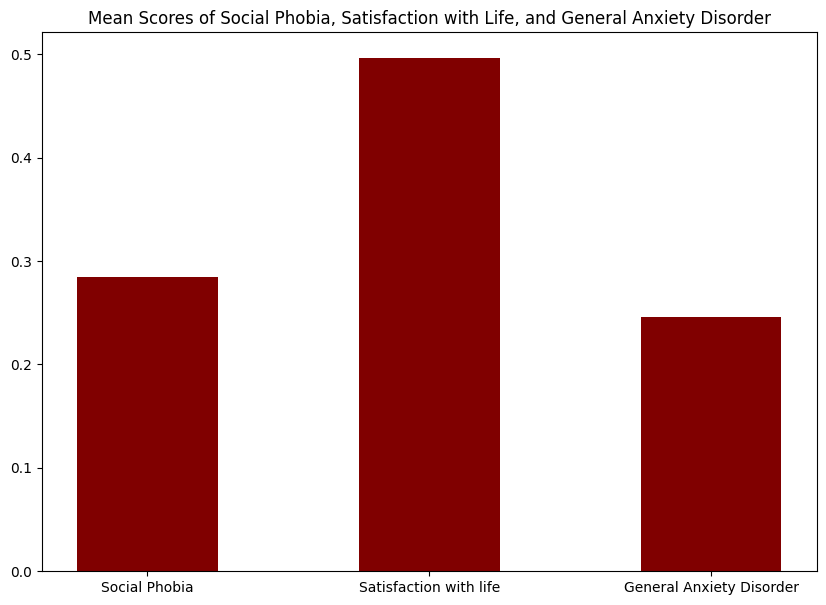

In [59]:
# Convert columns to numeric type
df['SPIN_T'] = pd.to_numeric(df['SPIN_T'], errors='coerce')
df['SWL_T'] = pd.to_numeric(df['SWL_T'], errors='coerce')
df['GAD_T'] = pd.to_numeric(df['GAD_T'], errors='coerce')

# Calculate means
x = df['SPIN_T'].mean()
y = df['SWL_T'].mean()
z = df['GAD_T'].mean()

c = [x, y, z]

# Plot the bar chart with title
plt.figure(figsize=(10, 7))
plt.bar(['Social Phobia', 'Satisfaction with life', 'General Anxiety Disorder'], c, color='maroon', width=0.5)
plt.title('Mean Scores of Social Phobia, Satisfaction with Life, and General Anxiety Disorder')
plt.show()

In [60]:
#Side by Side Bar Graph of Platform by Gender
# Create the histogram plot
fig = px.histogram(df, y="Platform", color="Gender", barmode="group", log_x=True)

# Show the plot
fig.show()

In [61]:
#Side by Side Bar Graph of Playstyle by Gender
fig = px.histogram(df, y="Playstyle", color="Gender", barmode="group", log_x=True)
fig.show()

In [62]:
#Violin Plot of Work vs Hours
fig = px.violin(df_filtered_iqr, y="Hours", x="Work",color="Work", hover_data=[df_filtered_iqr.Hours])
fig.update_layout(showlegend=False)
fig.show()

Label Encoding

In [63]:
le = LabelEncoder()

In [64]:
df_filtered_iqr.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  SWL2  \
0     0     0     0     0     1     0     0  Not difficult at all     3     5   
5     0     0     0     0     0     1     0  Not difficult at all     3     5   
6     0     0     0     0     0     0     0  Not difficult at all     3     4   
7     0     0     0     0     0     0     0    Somewhat difficult     3     6   
9     2     1     2     2     2     1     0    Somewhat difficult     3     3   

   SWL3  SWL4  SWL5               Game                 Platform  ...  SPIN16  \
0     5     5     5             Skyrim  Console (PS, Xbox, ...)  ...     1.0   
5     3     3     3              Other  Console (PS, Xbox, ...)  ...     0.0   
6     4     3     2              Other                       PC  ...     1.0   
7     4     3     7              Other  Console (PS, Xbox, ...)  ...     0.0   
9     3     2     2  World of Warcraft                       PC  ...     0.0   

  SPIN17 Narcissism  Gender       Age                       Work  \
0    0.0        1.0    Male  0.184211  Unemployed / between jobs   
5    0.0        2.0    Male  0.157895                   Employed   
6    1.0        2.0    Male  0.289474                   Employed   
7    0.0        5.0  Female  0.131579                   Employed   
9    2.0        1.0  Female  0.236842                   Employed   

                                Degree  Residence  Reference  \
0             Bachelor (or equivalent)        USA     Reddit   
5             Bachelor (or equivalent)        USA     Reddit   
6  High school diploma (or equivalent)        USA     Reddit   
7             Bachelor (or equivalent)      Japan     Reddit   
9  High school diploma (or equivalent)    Finland     Reddit   

                                           Playstyle  accept     GAD_T  \
0                                       singleplayer  Accept  0.047619   
5        multiplayer  online  with real life friends  Accept  0.047619   
6  multiplayer  online  with online acquaintances...  Accept  0.000000   
7                                       singleplayer  Accept  0.000000   
9  multiplayer  online  with online acquaintances...  Accept  0.476190   

      SWL_T    SPIN_T  Residence_ISO3  
0  0.600000  0.073529             USA  
5  0.400000  0.191176             USA  
6  0.366667  0.382353             USA  
7  0.600000  0.205882             JPN  
9  0.266667  0.382353             FIN  

[5 rows x 50 columns]

In [65]:
for i in df_filtered_iqr.columns:
    if df_filtered_iqr[i].dtype == 'object':
        df_filtered_iqr[i] = le.fit_transform(df_filtered_iqr[i])

In [66]:
df_filtered_iqr.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  SWL3  SWL4  \
0     0     0     0     0     1     0     0     1     3     5     5     5   
5     0     0     0     0     0     1     0     1     3     5     3     3   
6     0     0     0     0     0     0     0     1     3     4     4     3   
7     0     0     0     0     0     0     0     2     3     6     4     3   
9     2     1     2     2     2     1     0     2     3     3     3     2   

   SWL5  Game  Platform  ...  SPIN16  SPIN17  Narcissism  Gender       Age  \
0     5     8         0  ...     1.0     0.0         1.0       1  0.184211   
5     3     7         0  ...     0.0     0.0         2.0       1  0.157895   
6     2     7         1  ...     1.0     1.0         2.0       1  0.289474   
7     7     7         0  ...     0.0     0.0         5.0       0  0.131579   
9     2    10         1  ...     0.0     2.0         1.0       0  0.236842   

   Work  Degree  Residence  Reference  Playstyle  accept     GAD_T     SWL_T  \
0     3       0         88          2          4       0  0.047619  0.600000   
5     0       0         88          2          2       0  0.047619  0.400000   
6     0       1         88          2          1       0  0.000000  0.366667   
7     0       0         41          2          4       0  0.000000  0.600000   
9     0       1         25          2          1       0  0.476190  0.266667   

     SPIN_T  Residence_ISO3  
0  0.073529              88  
5  0.191176              88  
6  0.382353              88  
7  0.205882              45  
9  0.382353              26  

[5 rows x 50 columns]

Performing PCA analysis

In [67]:
x1 = PCA(n_components=2).fit_transform(df_filtered_iqr[['GAD_T', 'SWL_T', 'SPIN_T', 'Age', 'Hours', 'streams']])
x1

array([[ 0.09644849, -0.15155231],
       [-0.11657699, -0.12861665],
       [-0.17319293, -0.04919934],
       ...,
       [ 0.21673222,  0.01851275],
       [ 0.3798114 , -0.03272536],
       [ 0.12396366,  0.00156907]])

Finding Number of Clusters

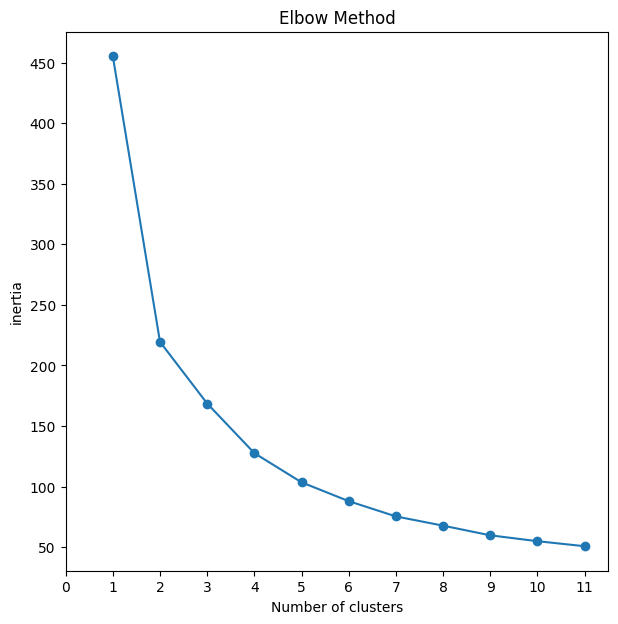

In [68]:
# Elbow Method
inertia = []
for i in range(1,12):
    model = KMeans(n_clusters = i)
    model.fit(x1)
    inertia.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12),inertia,marker='o')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.show()

From this it is slightly diffuclt to say the number of clusters. It may be 4 or 5. So, we are also performing Silhouette Analysis

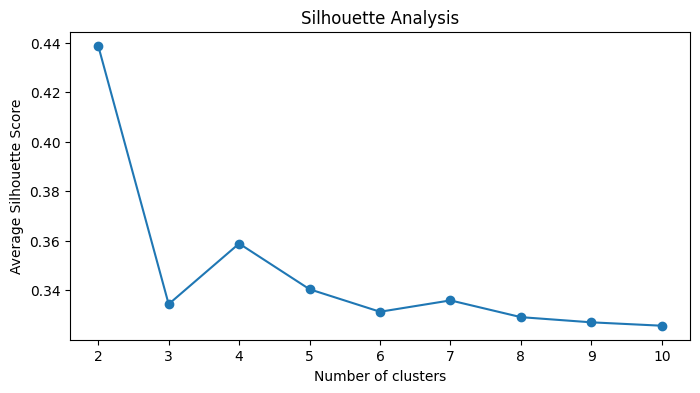

In [69]:
# Silhouette Analysis
silhouette_avg = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(x1)
    silhouette_avg.append(silhouette_score(x1, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

From the graph we can clearly fix number of clusters as 4. We are further going a point ahead and plotting graph for different number of clusters.

For n_clusters = 2 The average silhouette_score is : 0.4385818880398066
For n_clusters = 3 The average silhouette_score is : 0.33434682751819067
For n_clusters = 4 The average silhouette_score is : 0.36304335508662317
For n_clusters = 5 The average silhouette_score is : 0.35125836574734676
For n_clusters = 6 The average silhouette_score is : 0.349927836206573


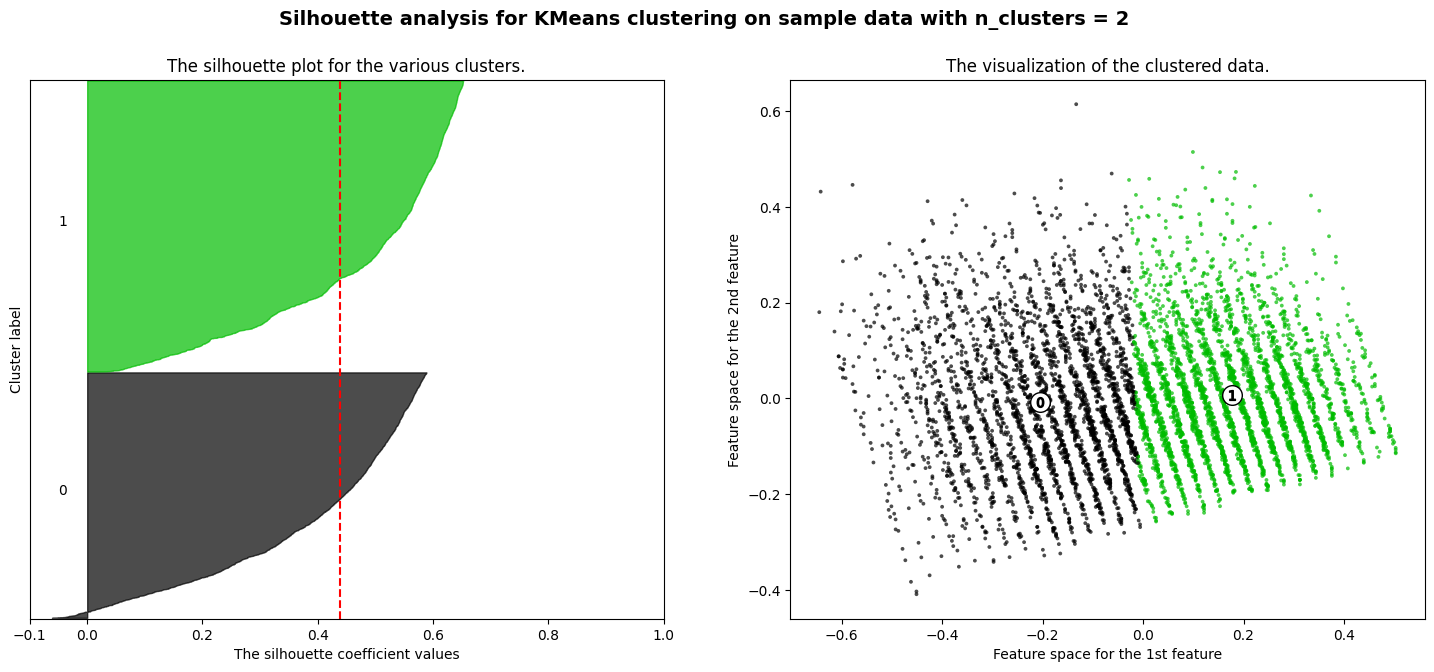

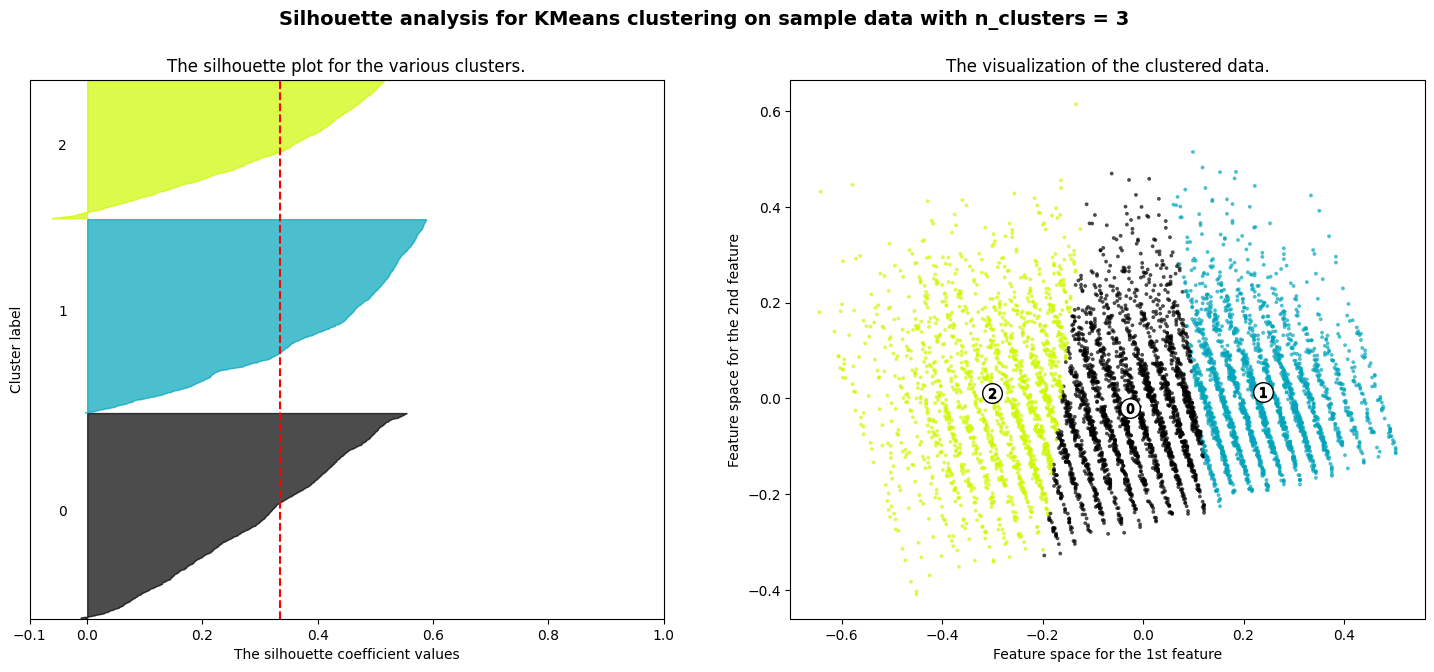

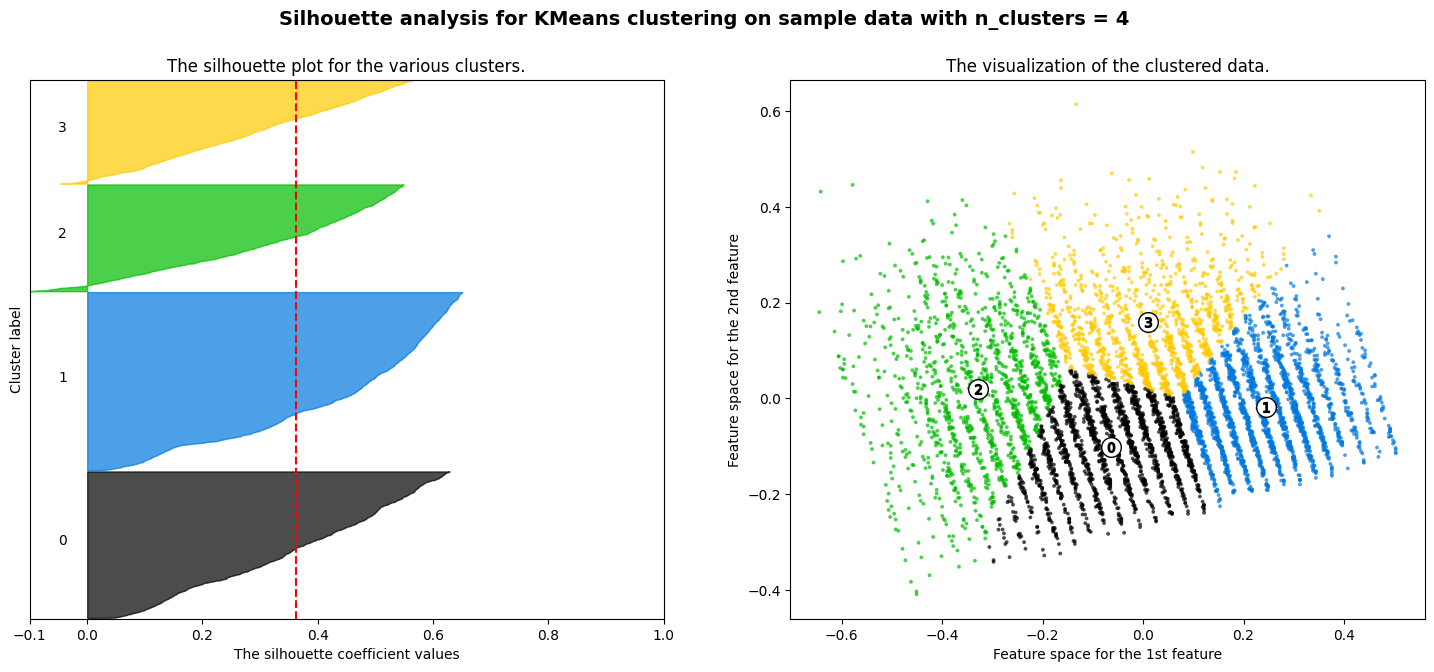

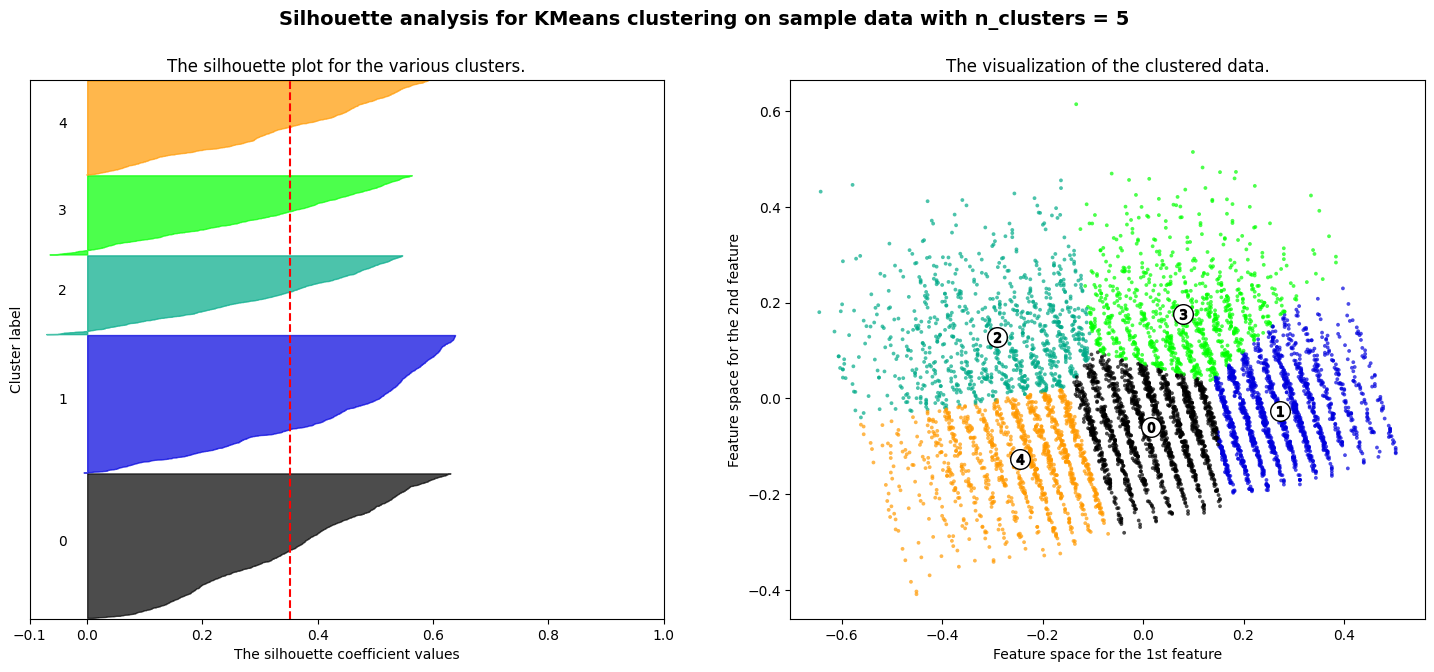

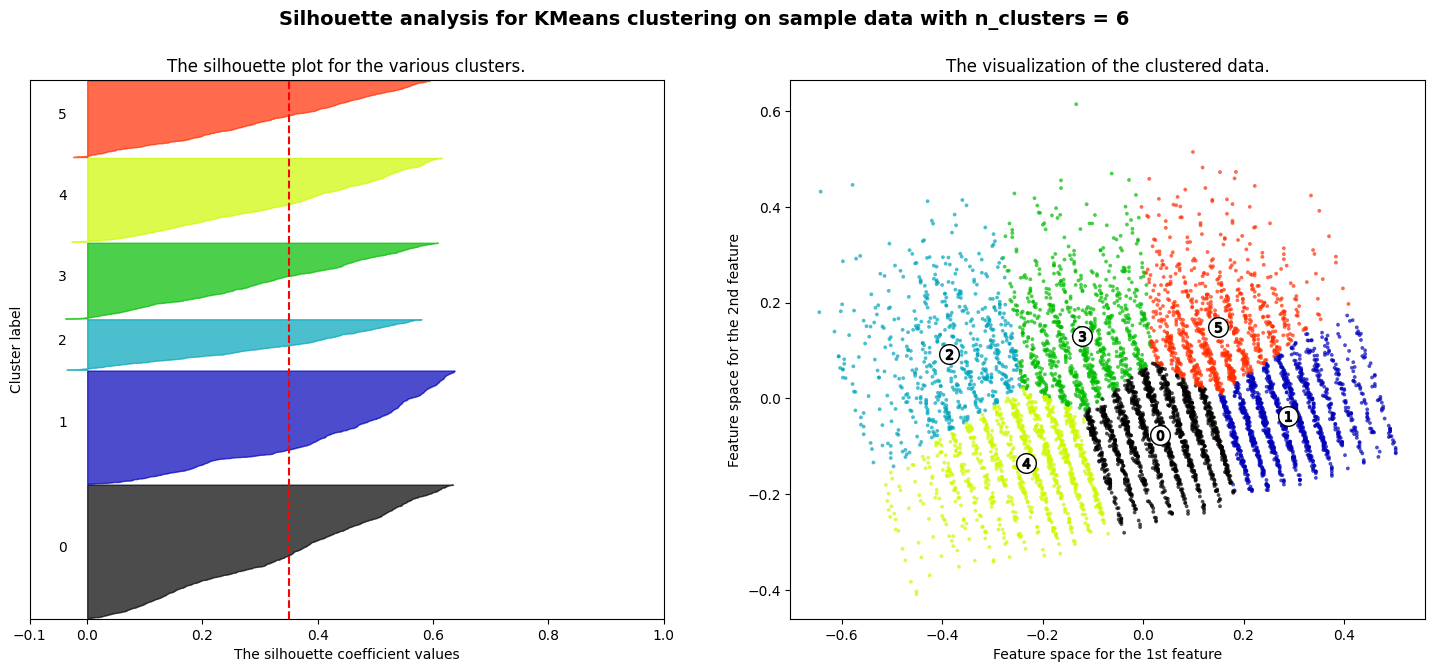

In [70]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x1)

    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x1[:, 0], x1[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the above analysis, we can conclude that using 4 clusters will be a good option.

Clustering

In [71]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x1)

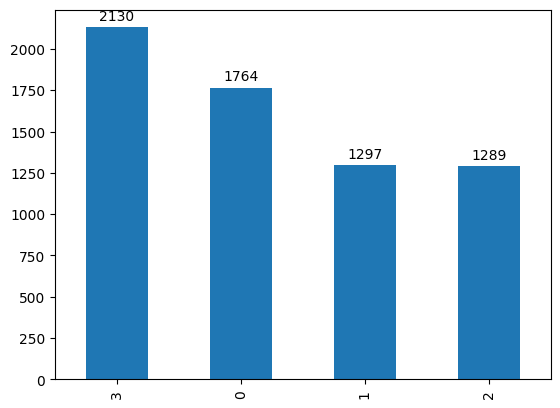

In [72]:
ax = pd.Series(y_clusters).value_counts().plot(kind='bar')

# Annotate bars with values on top
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{height}',  # Text (value)
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position (center of the bar)
        xytext=(0, 3),  # Offset for text position (optional)
        textcoords="offset points",
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

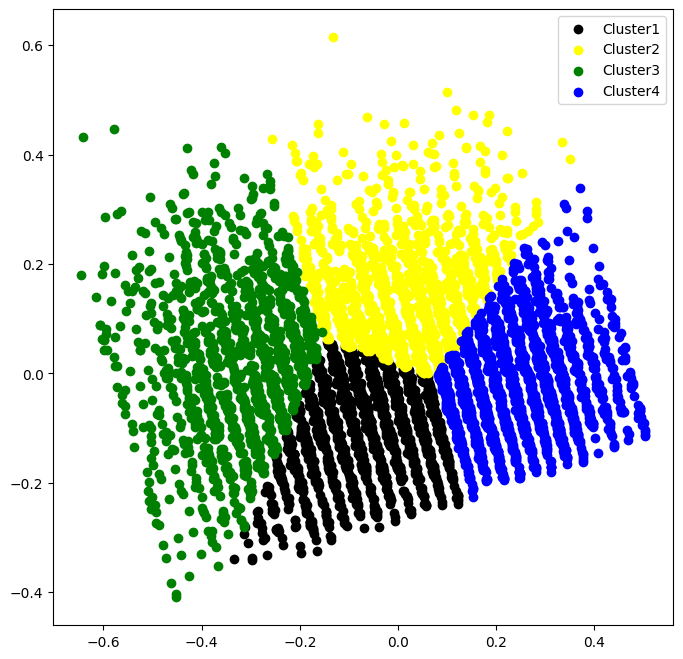

In [73]:
plt.figure(figsize=(8,8))

plt.scatter(x1[y_clusters == 0, 0], x1[y_clusters == 0, 1], c = 'black', label = 'Cluster1')
plt.scatter(x1[y_clusters == 1, 0], x1[y_clusters == 1, 1], c = 'yellow', label = 'Cluster2')
plt.scatter(x1[y_clusters == 2, 0], x1[y_clusters == 2, 1], c = 'green', label = 'Cluster3')
plt.scatter(x1[y_clusters == 3, 0], x1[y_clusters == 3, 1], c = 'blue', label = 'Cluster4')

plt.legend()
plt.show()

In [74]:
df_filtered_iqr['Label'] = y_clusters

In [75]:
df_filtered_iqr['Label'].value_counts()

Label
3    2130
0    1764
1    1297
2    1289
Name: count, dtype: int64

In [76]:
X = df_filtered_iqr.iloc[:,:-1]
y = df_filtered_iqr.iloc[:,-1]

In [77]:
# Splitting the data into train and test
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

Performing different Classification Algorithms to check the performance of the model.

Random Forest

We are writing a function calc_params which helps to find out the values of the parameters like max_depth, min_samples_leaf and n_estimators.

In [78]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

min_samples_leaf = 1 Train = 0.9982638749206767 Test = 0.9081818283361196
min_samples_leaf = 2 Train = 0.9946470232457664 Test = 0.9130026844588078
min_samples_leaf = 3 Train = 0.986834588282731 Test = 0.9108824832547107
min_samples_leaf = 4 Train = 0.9802757927737146 Test = 0.9112683974786193
min_samples_leaf = 5 Train = 0.9737655504472915 Test = 0.9128129851852126


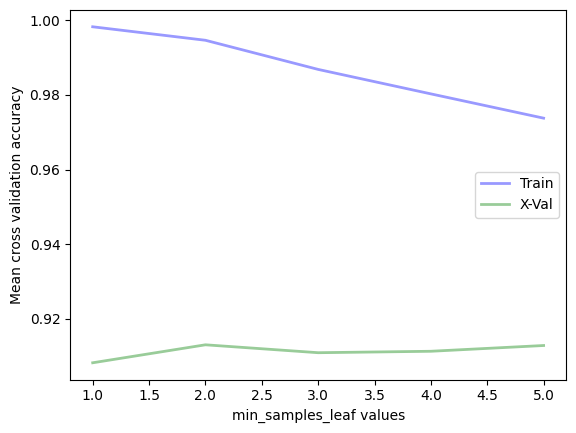

In [79]:
# Calculating min_samples_leaf
msl = range(1,6)

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)

max_depth = 1 Train = 0.5899402130805715 Test = 0.5945229221506946
max_depth = 2 Train = 0.7677949855817046 Test = 0.756752102701958
max_depth = 3 Train = 0.8239778659806591 Test = 0.8134654836679909
max_depth = 4 Train = 0.8795814799372808 Test = 0.8618832911986238
max_depth = 5 Train = 0.9095294805948881 Test = 0.8792462665172405
max_depth = 6 Train = 0.933642414181436 Test = 0.9020070145913927
max_depth = 7 Train = 0.9511477316618141 Test = 0.907408882915151
max_depth = 8 Train = 0.9690877256949813 Test = 0.9133885986827164
max_depth = 9 Train = 0.982301306913085 Test = 0.914742370142563
max_depth = 10 Train = 0.9899209359788618 Test = 0.9081823868226954


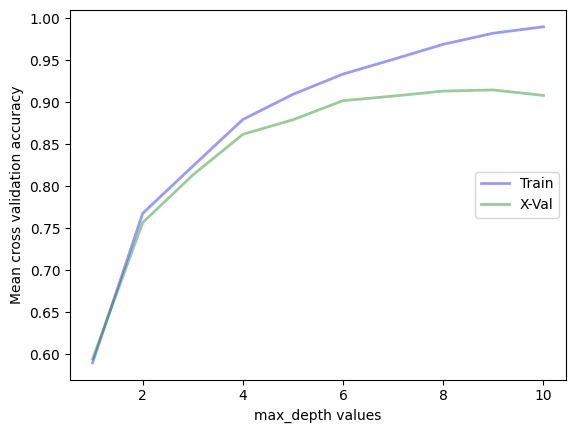

In [80]:
# Calculating max_depth
m_depth = [1,2,3,4,5,6,7,8,9,10]

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

n_estimators = 5 Train = 0.9901620857777544 Test = 0.8811773269343183
n_estimators = 10 Train = 0.9982638749206767 Test = 0.9081818283361196
n_estimators = 15 Train = 0.9997106574468327 Test = 0.9234205068824162
n_estimators = 20 Train = 0.9998553287234163 Test = 0.9280501744339738
n_estimators = 25 Train = 0.9999517839922853 Test = 0.9330657562094398
n_estimators = 30 Train = 1.0 Test = 0.9346090407806897
n_estimators = 35 Train = 0.9999517839922853 Test = 0.9334520427577322
n_estimators = 40 Train = 1.0 Test = 0.9359602059698492
n_estimators = 45 Train = 1.0 Test = 0.9380818964714818
n_estimators = 50 Train = 1.0 Test = 0.9376948652744218
n_estimators = 55 Train = 1.0 Test = 0.9402030284865386
n_estimators = 60 Train = 1.0 Test = 0.9384670660466223
n_estimators = 65 Train = 1.0 Test = 0.9380817103092898
n_estimators = 70 Train = 1.0 Test = 0.9386599300774806
n_estimators = 75 Train = 1.0 Test = 0.9373102541858568
n_estimators = 80 Train = 1.0 Test = 0.9386597439152886
n_estimators = 

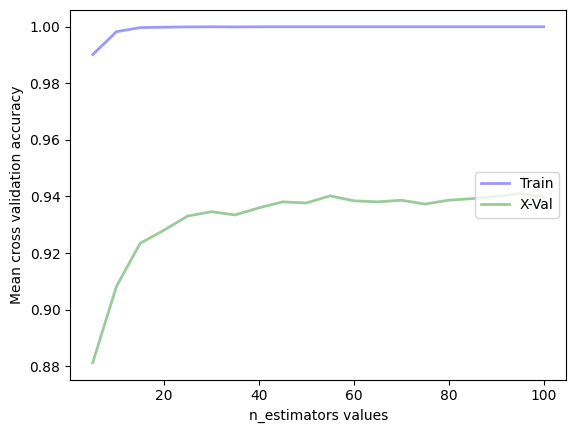

In [81]:
# Calculating n_estimators
nest = range(5, 101, 5)

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

From the above graphs, we can conclude that min_samples_leaf of 2, max_depth of 9 and n_estimators of 95 works well for the algorithm.

In [82]:
# Using the parameters from the above we run RandomForest Algorithm
rf = RandomForestClassifier(n_estimators = 95, min_samples_leaf=2, max_depth=9) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(rf_pred,y_test)

In [83]:
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

print(f'Cross-Validation Accuracy Scores of XgBoost: {scores}')
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Accuracy of Model: {accuracy_rf:.4f}')

Cross-Validation Accuracy Scores of XgBoost: [0.94058642 0.93287037 0.94135802 0.94058642 0.94598765]
Mean Accuracy: 0.9403
Accuracy of Model: 0.9375


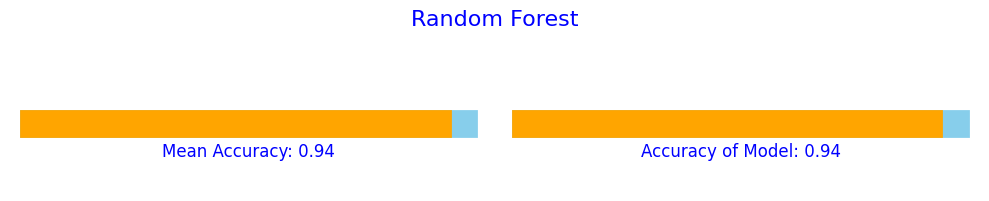

In [84]:
def gauge_chart(ax, value, label):
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    ax.plot([-0.9, 0.9], [0.5, 0.5], color='skyblue', linewidth=20)
    ax.plot([-0.9, -0.9 + 1.8 * value], [0.5, 0.5], color='orange', linewidth=20)

    ax.scatter([0], [0.5], color='blue', s=200)

    ax.text(0, 0.25, label, fontsize=12, color='blue', ha='center')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

# Plot gauge charts for mean accuracy and accuracy of the model
gauge_chart(ax1, mean_accuracy, f'Mean Accuracy: {mean_accuracy:.2f}')
gauge_chart(ax2, accuracy_rf, f'Accuracy of Model: {accuracy_rf:.2f}')

plt.suptitle('Random Forest', fontsize=16, color='blue')
plt.tight_layout()
plt.show()

Logistic Regression

In [85]:
lc = LogisticRegression(max_iter=3250 , n_jobs=-1)
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_lc = accuracy_score(lc_pred,y_test)

In [86]:
scores = cross_val_score(lc, X, y, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

print(f'Cross-Validation Accuracy Scores of XgBoost: {scores}')
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Accuracy of Model: {accuracy_lc:.4f}')

Cross-Validation Accuracy Scores of XgBoost: [0.97222222 0.97608025 0.97916667 0.9837963  0.97530864]
Mean Accuracy: 0.9773
Accuracy of Model: 0.9792


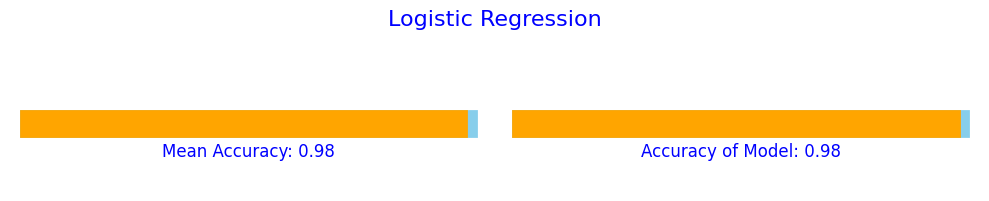

In [87]:
def gauge_chart(ax, value, label):
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    ax.plot([-0.9, 0.9], [0.5, 0.5], color='skyblue', linewidth=20)
    ax.plot([-0.9, -0.9 + 1.8 * value], [0.5, 0.5], color='orange', linewidth=20)

    ax.scatter([0], [0.5], color='blue', s=200)

    ax.text(0, 0.25, label, fontsize=12, color='blue', ha='center')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

# Plot gauge charts for mean accuracy and accuracy of the model
gauge_chart(ax1, mean_accuracy, f'Mean Accuracy: {mean_accuracy:.2f}')
gauge_chart(ax2, accuracy_lc, f'Accuracy of Model: {accuracy_lc:.2f}')

plt.suptitle('Logistic Regression', fontsize=16, color='blue')
plt.tight_layout()
plt.show()

We can clearly see that using Logistic Regression we got an increase on Accuracy compared to Random Forest.

XGBoost

In [88]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

max_depth = 1 Train = 0.7972608494156062 Test = 0.7953351477941641
max_depth = 2 Train = 0.9316167140145459 Test = 0.9201416321956343
max_depth = 3 Train = 0.9504726959270903 Test = 0.9400101644556804
max_depth = 4 Train = 0.9697145105418306 Test = 0.9527401213032842
max_depth = 5 Train = 0.9841820916422719 Test = 0.9625780484989741
max_depth = 6 Train = 0.9936824240501959 Test = 0.9664358876027149
max_depth = 7 Train = 0.9983121025551112 Test = 0.9693282895790128
max_depth = 8 Train = 0.9989872545570349 Test = 0.968749697486438
max_depth = 9 Train = 0.999373075632511 Test = 0.9675919548147128
max_depth = 10 Train = 0.9995177469090948 Test = 0.9654700781508883


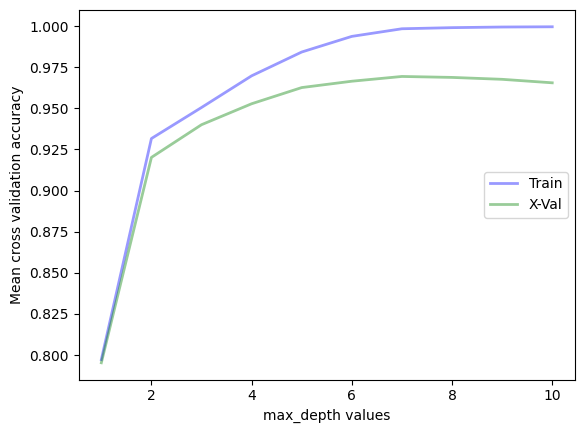

In [89]:
# Calculating max_depth
m_depth = [1,2,3,4,5,6,7,8,9,10]

xg = XGBClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, xg, m_depth, 'max_depth', 5)

n_estimators = 5 Train = 0.979600536131311 Test = 0.9562122323453087
n_estimators = 10 Train = 0.9936824240501959 Test = 0.9664358876027149
n_estimators = 15 Train = 0.9985050014661294 Test = 0.9708723187990305
n_estimators = 20 Train = 0.9997588618278274 Test = 0.9733797373623796
n_estimators = 25 Train = 1.0 Test = 0.9739588879415301
n_estimators = 30 Train = 1.0 Test = 0.974730716389347
n_estimators = 35 Train = 1.0 Test = 0.9745371077097211
n_estimators = 40 Train = 1.0 Test = 0.9747301579027712
n_estimators = 45 Train = 1.0 Test = 0.9743442436788629
n_estimators = 50 Train = 1.0 Test = 0.9751162582888716
n_estimators = 55 Train = 1.0 Test = 0.974537293871913
n_estimators = 60 Train = 1.0 Test = 0.9739585156171463
n_estimators = 65 Train = 1.0 Test = 0.9739585156171463
n_estimators = 70 Train = 1.0 Test = 0.9739587017793383
n_estimators = 75 Train = 1.0 Test = 0.973765651586288
n_estimators = 80 Train = 1.0 Test = 0.974537480034105
n_estimators = 85 Train = 1.0 Test = 0.97434480216

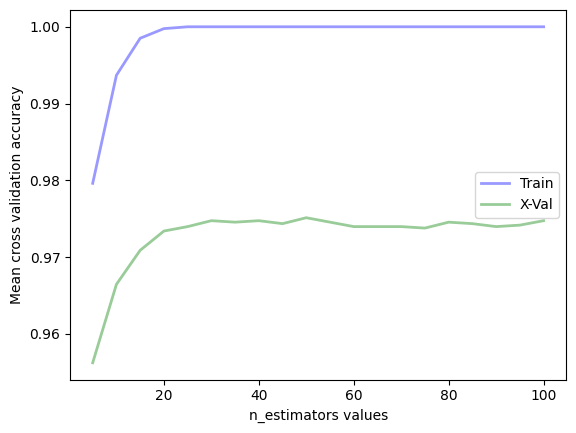

In [90]:
# Calculating n_estimators
nest = range(5, 101, 5)

xg = XGBClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, xg, nest, 'n_estimators', 5)

From the above graphs, we can conclude that max_depth of 7 and n_estimators of 50 works well for the algorithm.

In [91]:
# Using the parameters from the above we run XgBoost Algorithm
xg = XGBClassifier(n_estimators=60, max_depth=7)
xg.fit(X_train,y_train)
xg_pred = xg.predict(X_test)
accuracy_xg = accuracy_score(xg_pred,y_test)

In [92]:
scores = cross_val_score(xg, X, y, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

print(f'Cross-Validation Accuracy Scores of XgBoost: {scores}')
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Accuracy of Model: {accuracy_xg:.4f}')

Cross-Validation Accuracy Scores of XgBoost: [0.97067901 0.97453704 0.98148148 0.98225309 0.98302469]
Mean Accuracy: 0.9784
Accuracy of Model: 0.9722


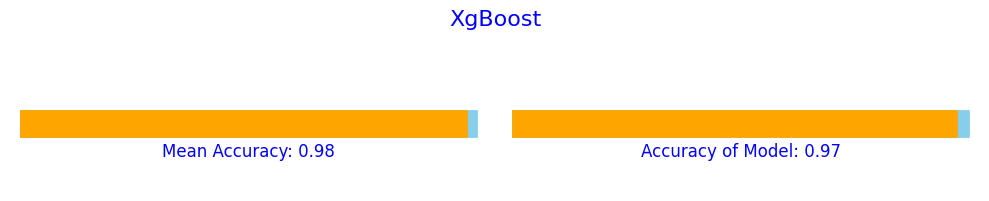

In [93]:
def gauge_chart(ax, value, label):
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    ax.plot([-0.9, 0.9], [0.5, 0.5], color='skyblue', linewidth=20)
    ax.plot([-0.9, -0.9 + 1.8 * value], [0.5, 0.5], color='orange', linewidth=20)

    ax.scatter([0], [0.5], color='blue', s=200)

    ax.text(0, 0.25, label, fontsize=12, color='blue', ha='center')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

# Plot gauge charts for mean accuracy and accuracy of the model
gauge_chart(ax1, mean_accuracy, f'Mean Accuracy: {mean_accuracy:.2f}')
gauge_chart(ax2, accuracy_xg, f'Accuracy of Model: {accuracy_xg:.2f}')

plt.suptitle('XgBoost', fontsize=16, color='blue')
plt.tight_layout()
plt.show()

By performing Cross-Validation we can ensure that the results are robust and not dependent on a particular train-test split.

We can see that we didn't gain much using XgBoost compared to logistic Regression.

Model Evaluation

In [94]:
# Calculate classification reports for each model
report_rf = classification_report(rf_pred, y_test, output_dict=True)
report_lc = classification_report(lc_pred, y_test, output_dict=True)
report_xg = classification_report(xg_pred, y_test, output_dict=True)

# Convert classification reports to pandas DataFrames
df_rf = pd.DataFrame(report_rf).transpose()
df_lc = pd.DataFrame(report_lc).transpose()
df_xg = pd.DataFrame(report_xg).transpose()

# Function to color code the DataFrame
def color_negative_red(val):
    color = 'red' if val < 0.5 else 'green'
    return 'color: %s' % color

# Apply color coding to the DataFrames
styled_df_rf = df_rf.style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']])
styled_df_lc = df_lc.style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']])
styled_df_xg = df_xg.style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']])

# Display classification reports
print("Random Forest Classification Report:")
display(styled_df_rf)

print("\nLogistic Regression Classification Report:")
display(styled_df_lc)

print("\nXGBoost Classification Report:")
display(styled_df_xg)


Random Forest Classification Report:



Logistic Regression Classification Report:



XGBoost Classification Report:


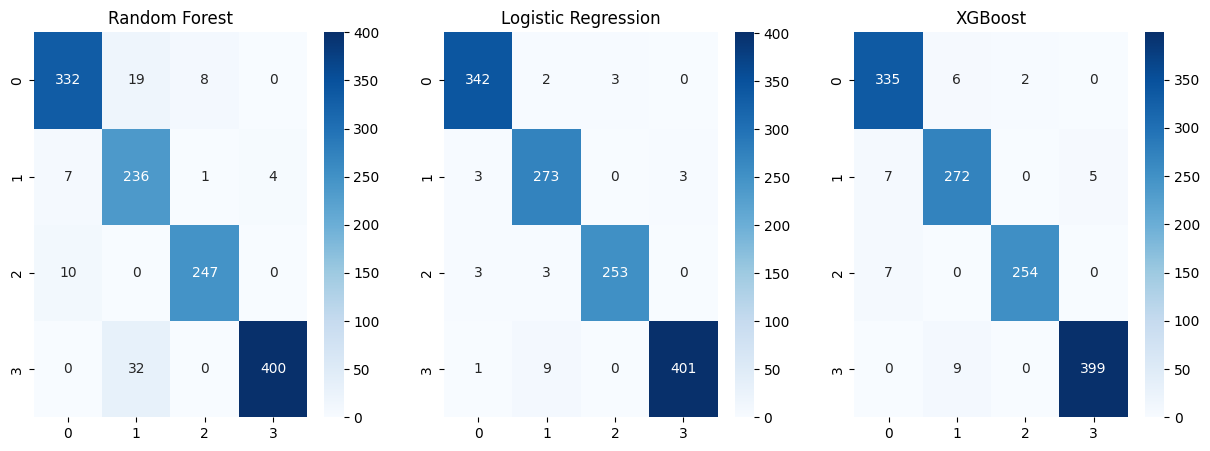

In [95]:
# Comparion of Confusion Matrices
conf_mat_rf = confusion_matrix(rf_pred,y_test)
conf_mat_lc = confusion_matrix(lc_pred,y_test)
conf_mat_xg = confusion_matrix(xg_pred,y_test)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest')
sns.heatmap(conf_mat_lc, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Logistic Regression')
sns.heatmap(conf_mat_xg, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('XGBoost')
plt.show()

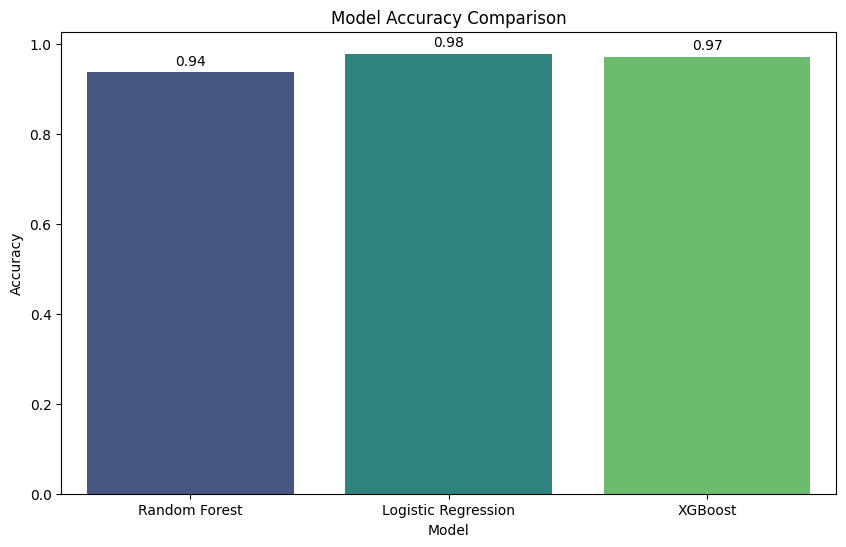

In [96]:
# Collect accuracies in a DataFrame
accuracies = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [accuracy_rf, accuracy_lc, accuracy_xg]
})

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns_plot = sns.barplot(x='Model', y='Accuracy', data=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')

# Annotate bars with values on top
for bar in sns_plot.patches:
    height = bar.get_height()
    sns_plot.annotate(
        f'{height:.2f}',  # Text (value)
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position (center of the bar)
        xytext=(0, 3),  # Offset for text position (optional)
        textcoords="offset points",
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.show()

Finally, we can conclude both the Logistic Regression and XgBoost are the best models. But we cannot rely on XgBoost because it may be overfitting, we can see that the Accuracy on the training data is 100%.